<a href="https://colab.research.google.com/github/bapubordekar1111/customer-segmentation/blob/main/Copy_of_customer_segmenation_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [7]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [8]:
plt.rcParams['figure.figsize'] = (8,5)

## Task 1: Data Loading & Exploration

In [9]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [10]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [11]:
df.shape

(200, 5)

In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [15]:
df['Genre'].replace({'Male':1 , 'Female':0} , inplace = True)

All columns have correct dtype

In [16]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No null values detected

In [17]:
for i in df.columns:
  print(i, len(df[df[i]== 0])
  )

CustomerID 0
Genre 112
Age 0
Annual Income (k$) 0
Spending Score (1-100) 0


No zeros detected in our dataset

## Task 2: Create Scatter Plot between Annual Income & Spending Score

<function matplotlib.pyplot.show>

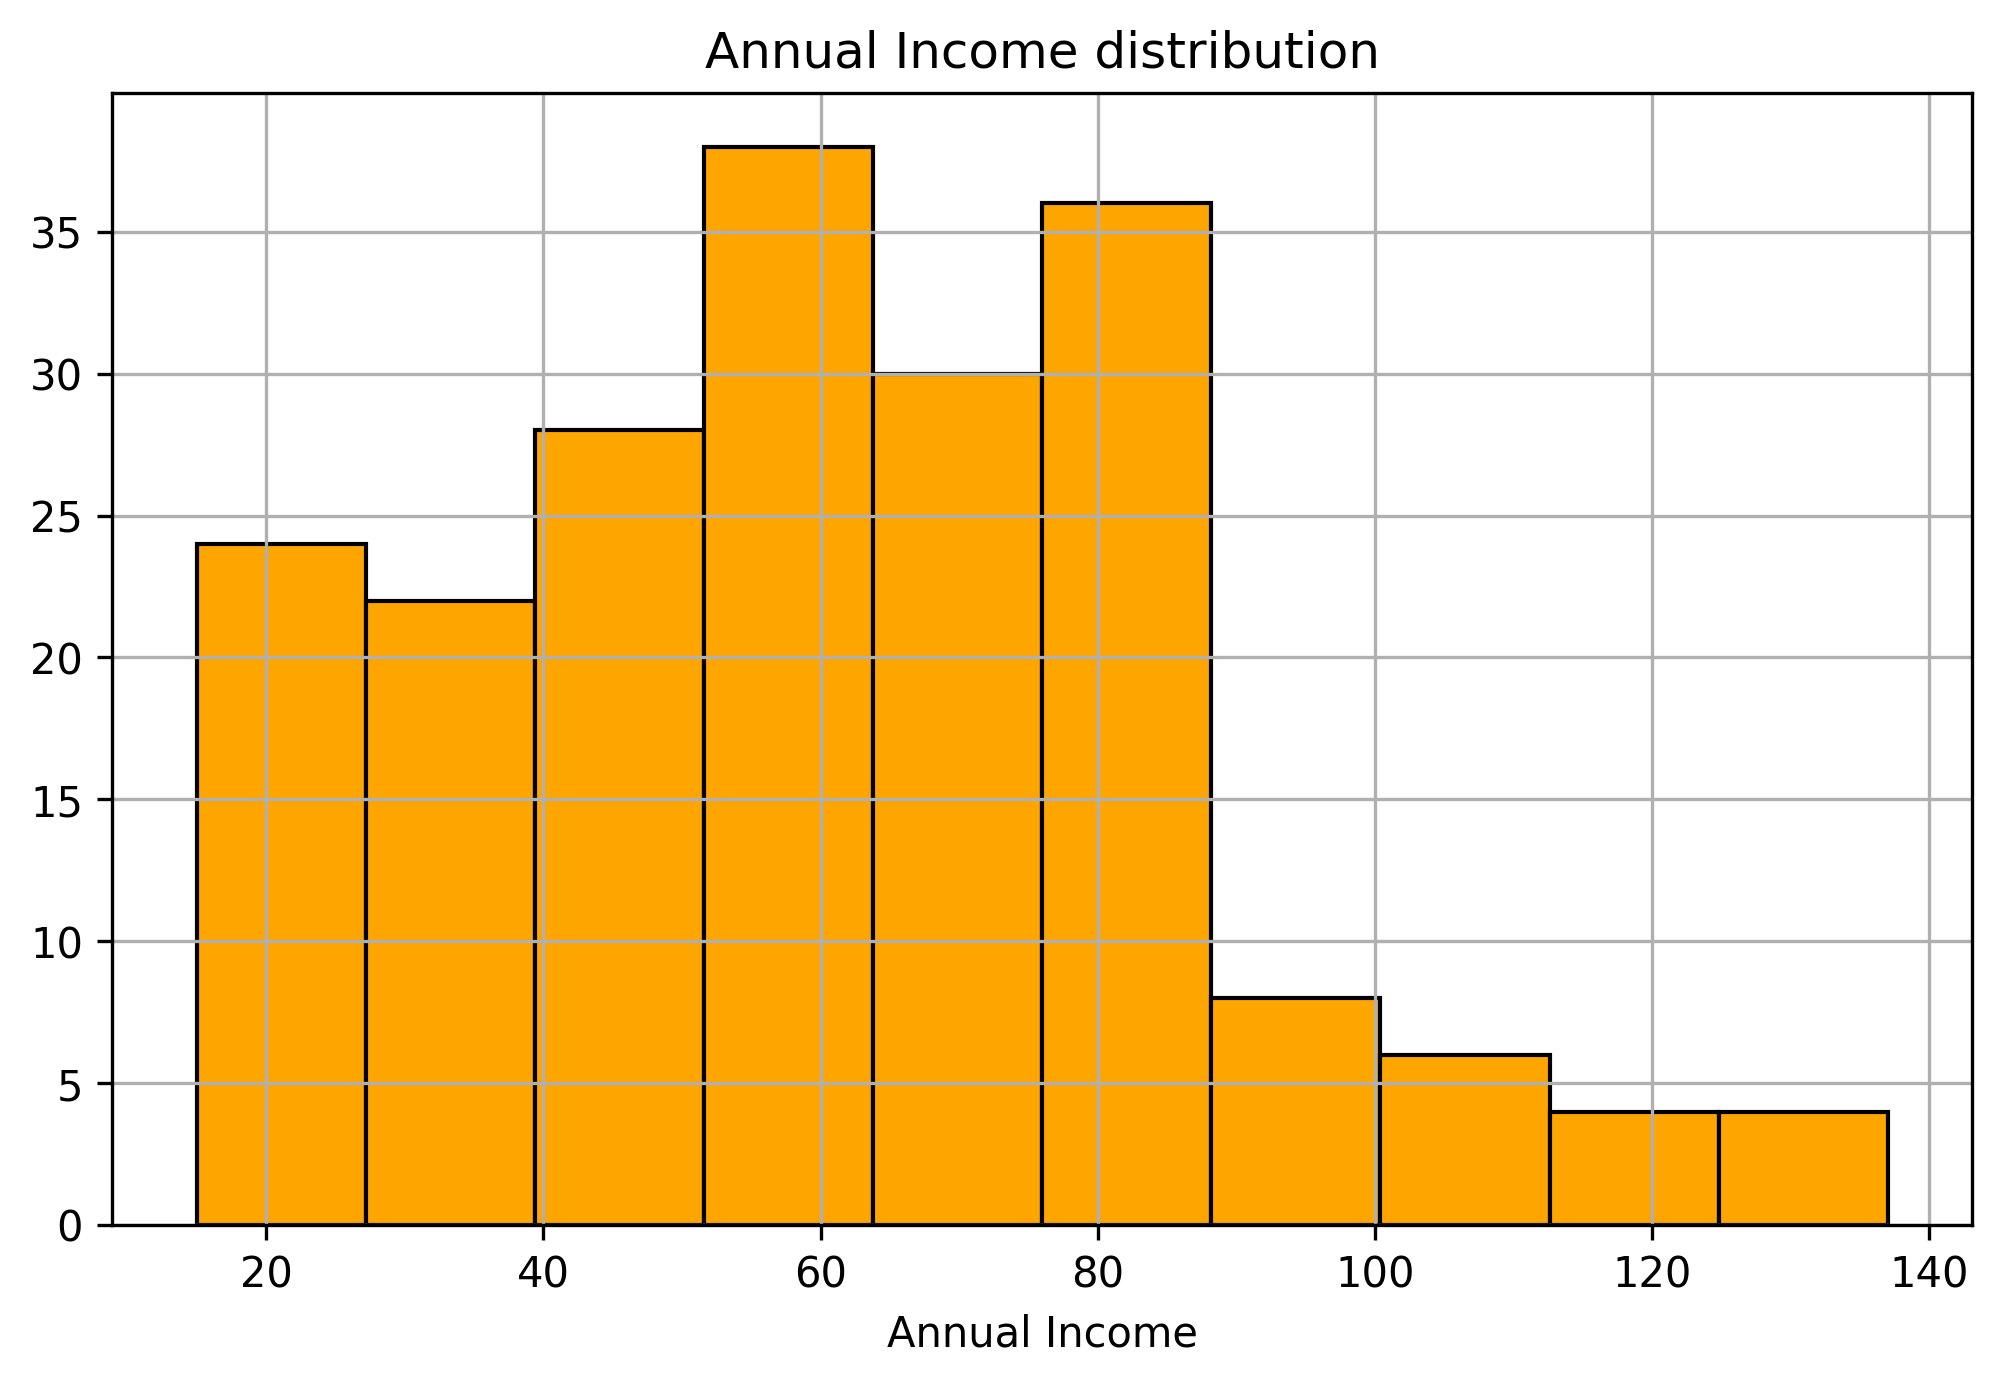

In [18]:
plt.plot(figsize=(5,3))
plt.hist(df["Annual Income (k$)"], color='orange', edgecolor='k')
plt.title("Annual Income distribution")
plt.xlabel("Annual Income")
plt.grid(True)
plt.show

<function matplotlib.pyplot.show>

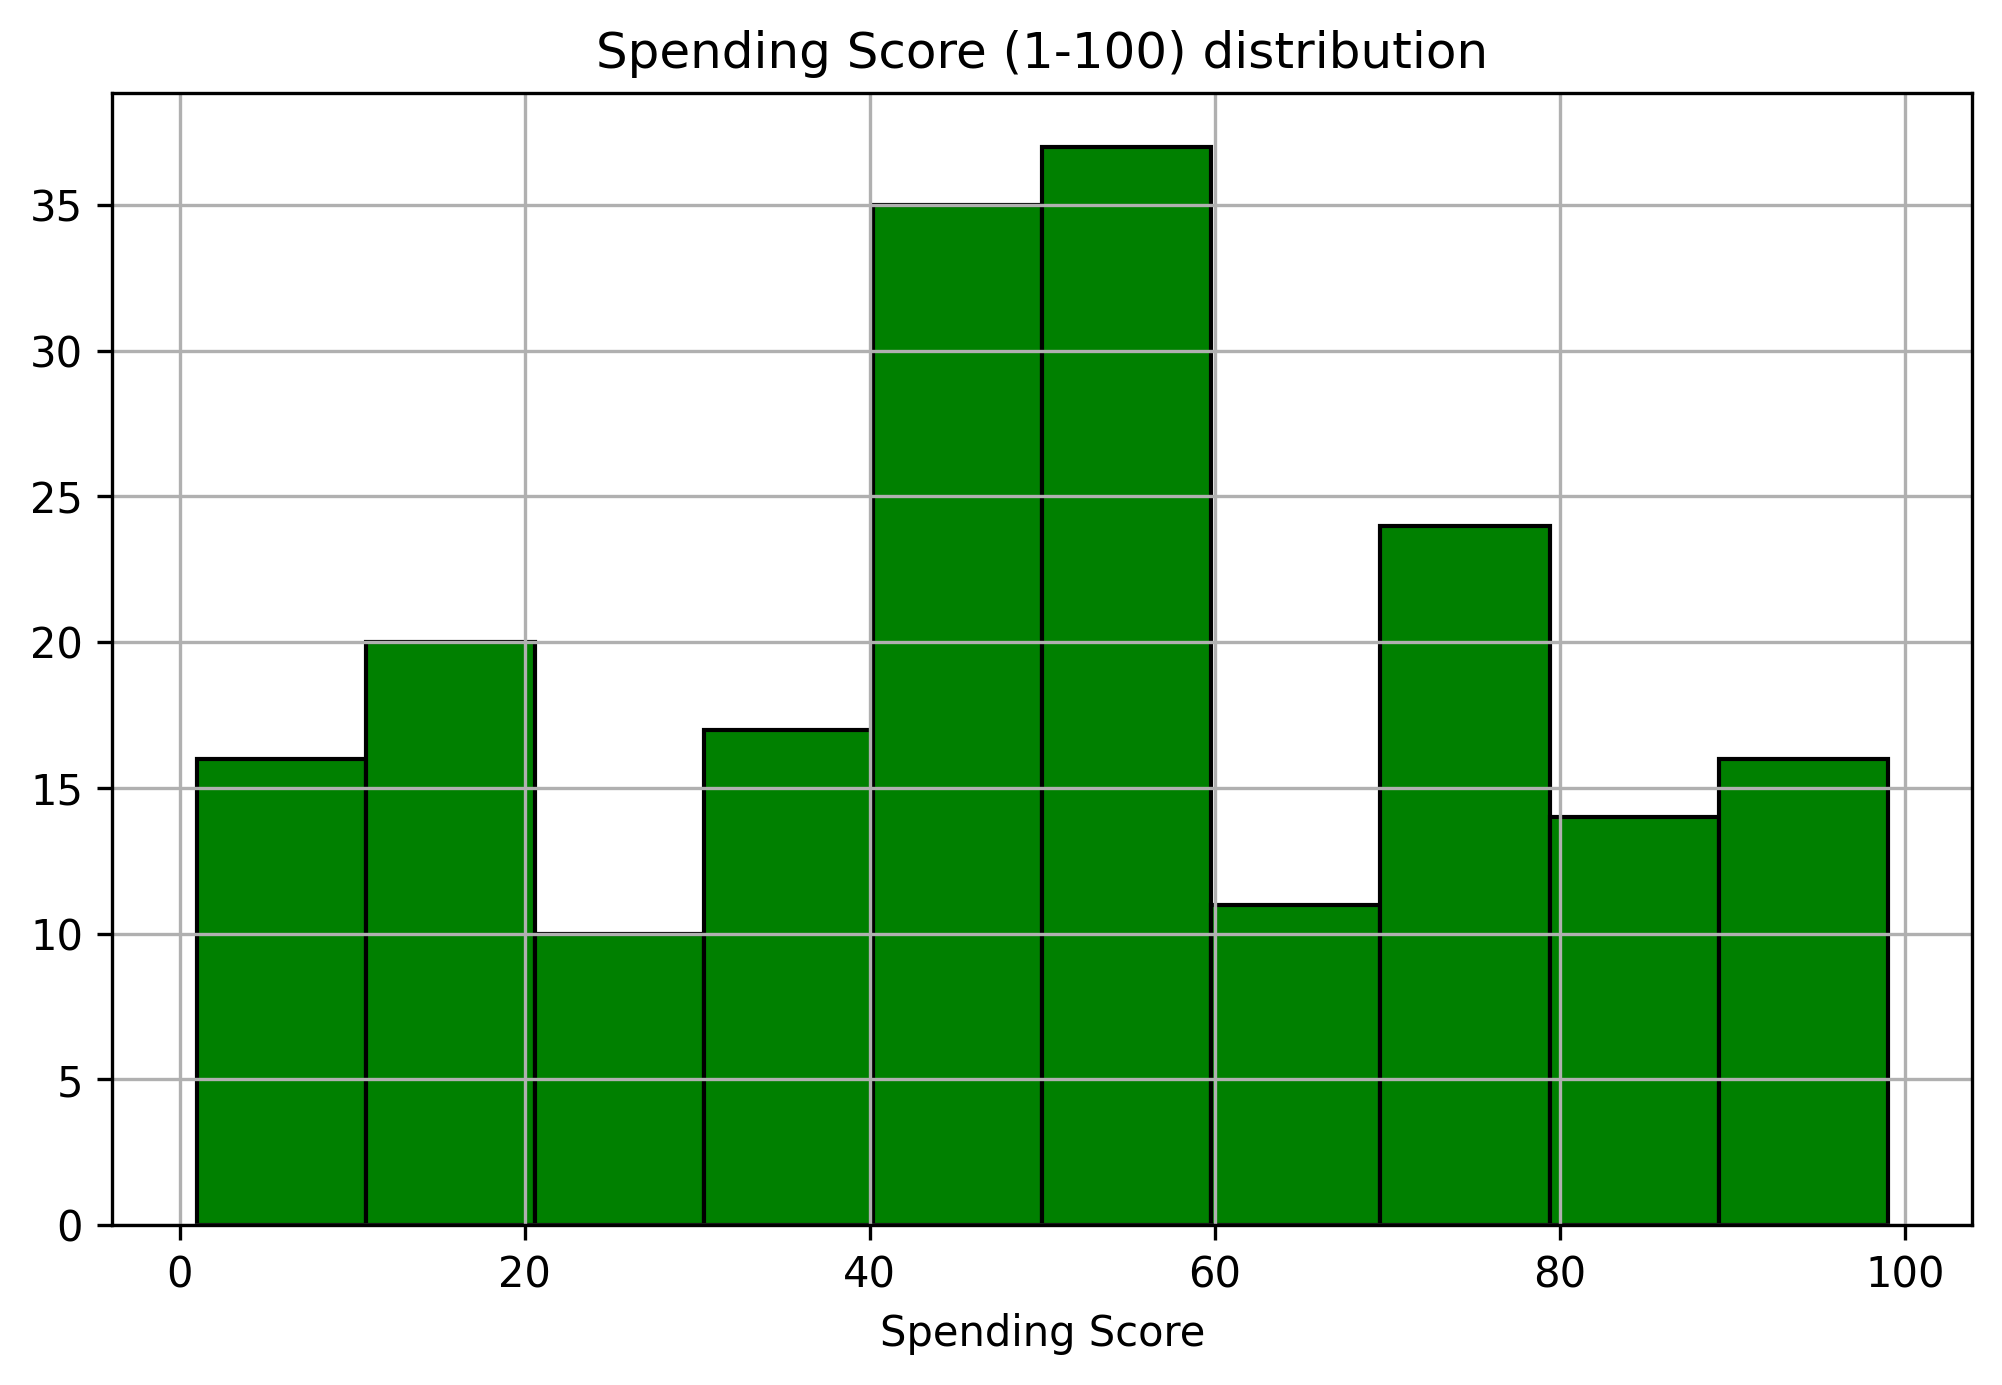

In [19]:
plt.plot(figsize=(8,5))
plt.hist(df["Spending Score (1-100)"], color='green', edgecolor='k')
plt.title("Spending Score (1-100) distribution")
plt.xlabel("Spending Score")
plt.grid(True)
plt.show

<function matplotlib.pyplot.show>

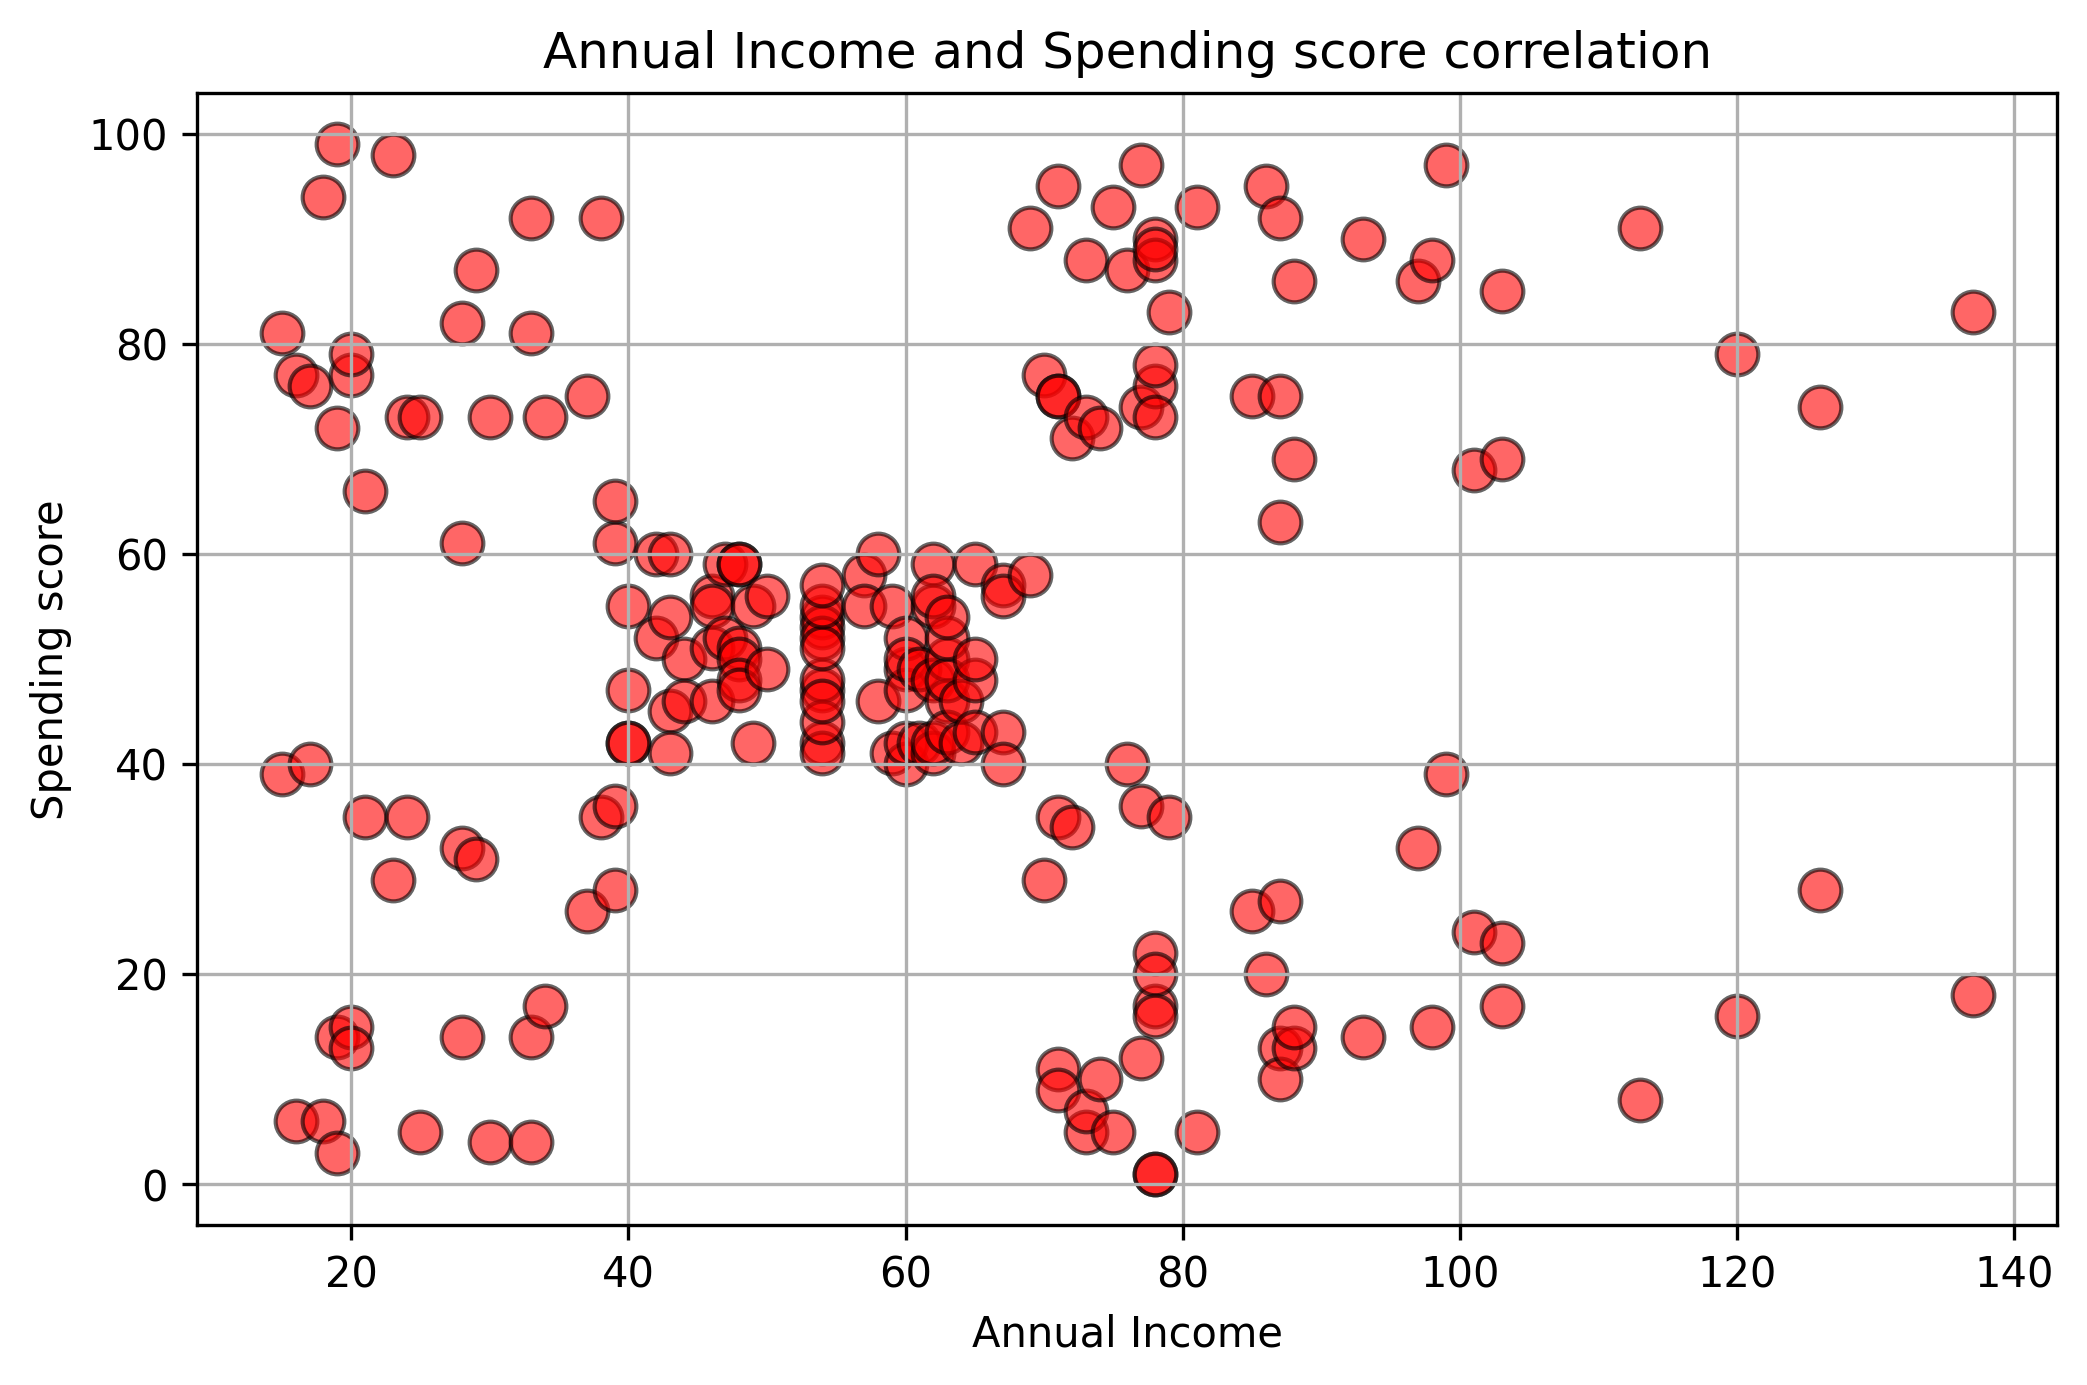

In [20]:
plt.plot(figsize=(8,5))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], color='red', edgecolor='k', alpha=0.6, s=100)
plt.title("Annual Income and Spending score correlation")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.grid(True)
plt.show

There is no correlation between Spending score and Annual income

##Relation between gender and spending score

Text(0.5, 1.0, 'Customers Genre')

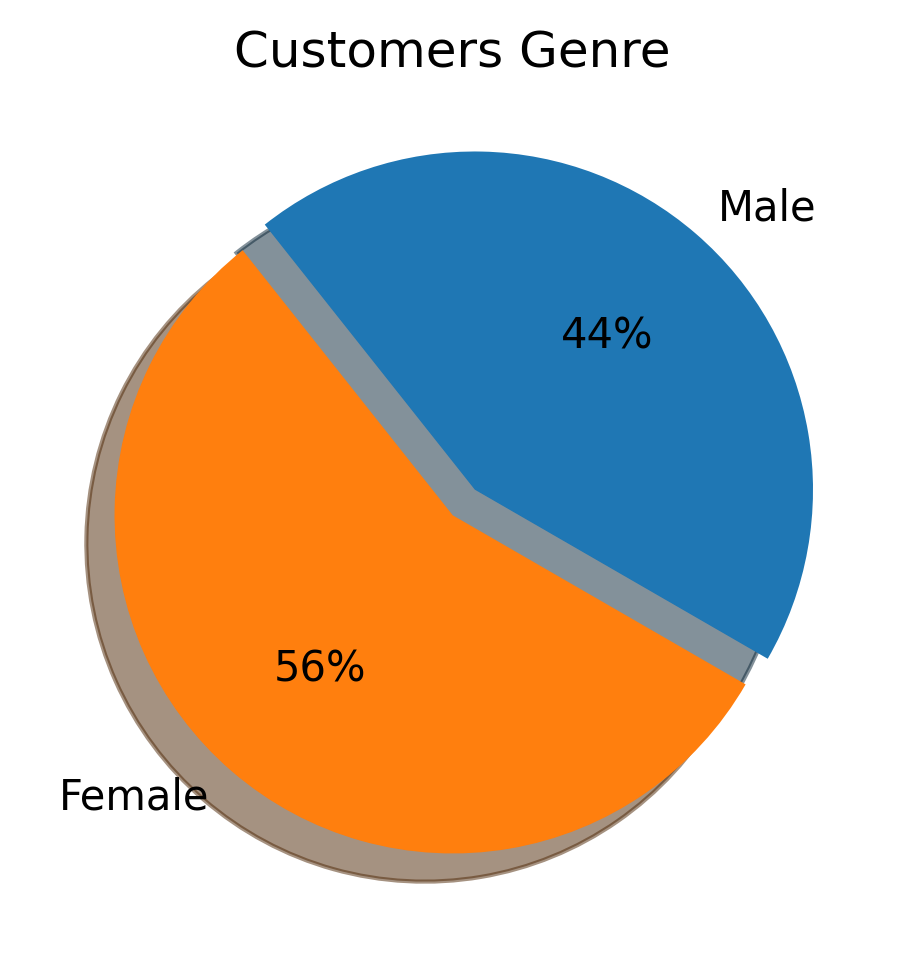

In [21]:
plt.subplot(1,2,1)
plt.pie(x = [len(df[df.Genre == 1]) , len(df[df.Genre == 0])] , labels = ['Male' , 'Female']
       , shadow = True , startangle = -30 , explode = [0.1,0] , autopct = '%.0f%%')

plt.title("Customers Genre")

The pie chart is showing that our female customers are more than our male customers.

## Task 3: Perform Scaling using MinMaxScaler

In [22]:
from sklearn.preprocessing import MinMaxScaler


In [23]:
scaler = MinMaxScaler()
print(scaler.fit(df))
print(scaler.data_max_)
print(scaler.transform(df))





MinMaxScaler()
[200.   1.  70. 137.  99.]
[[0.         1.         0.01923077 0.         0.3877551 ]
 [0.00502513 1.         0.05769231 0.         0.81632653]
 [0.01005025 0.         0.03846154 0.00819672 0.05102041]
 [0.01507538 0.         0.09615385 0.00819672 0.7755102 ]
 [0.0201005  0.         0.25       0.01639344 0.39795918]
 [0.02512563 0.         0.07692308 0.01639344 0.76530612]
 [0.03015075 0.         0.32692308 0.02459016 0.05102041]
 [0.03517588 0.         0.09615385 0.02459016 0.94897959]
 [0.04020101 1.         0.88461538 0.03278689 0.02040816]
 [0.04522613 0.         0.23076923 0.03278689 0.7244898 ]
 [0.05025126 1.         0.94230769 0.03278689 0.13265306]
 [0.05527638 0.         0.32692308 0.03278689 1.        ]
 [0.06030151 0.         0.76923077 0.04098361 0.14285714]
 [0.06532663 0.         0.11538462 0.04098361 0.7755102 ]
 [0.07035176 1.         0.36538462 0.04098361 0.12244898]
 [0.07537688 1.         0.07692308 0.04098361 0.79591837]
 [0.08040201 0.         0.3269

## Task 4: Develop Clusters using KMeans

In [24]:
X = df.iloc[ : , 3:].values
print(X[:10], "\n\n")
print(X[-10:])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]] 


[[103  23]
 [103  69]
 [113   8]
 [113  91]
 [120  16]
 [120  79]
 [126  28]
 [126  74]
 [137  18]
 [137  83]]


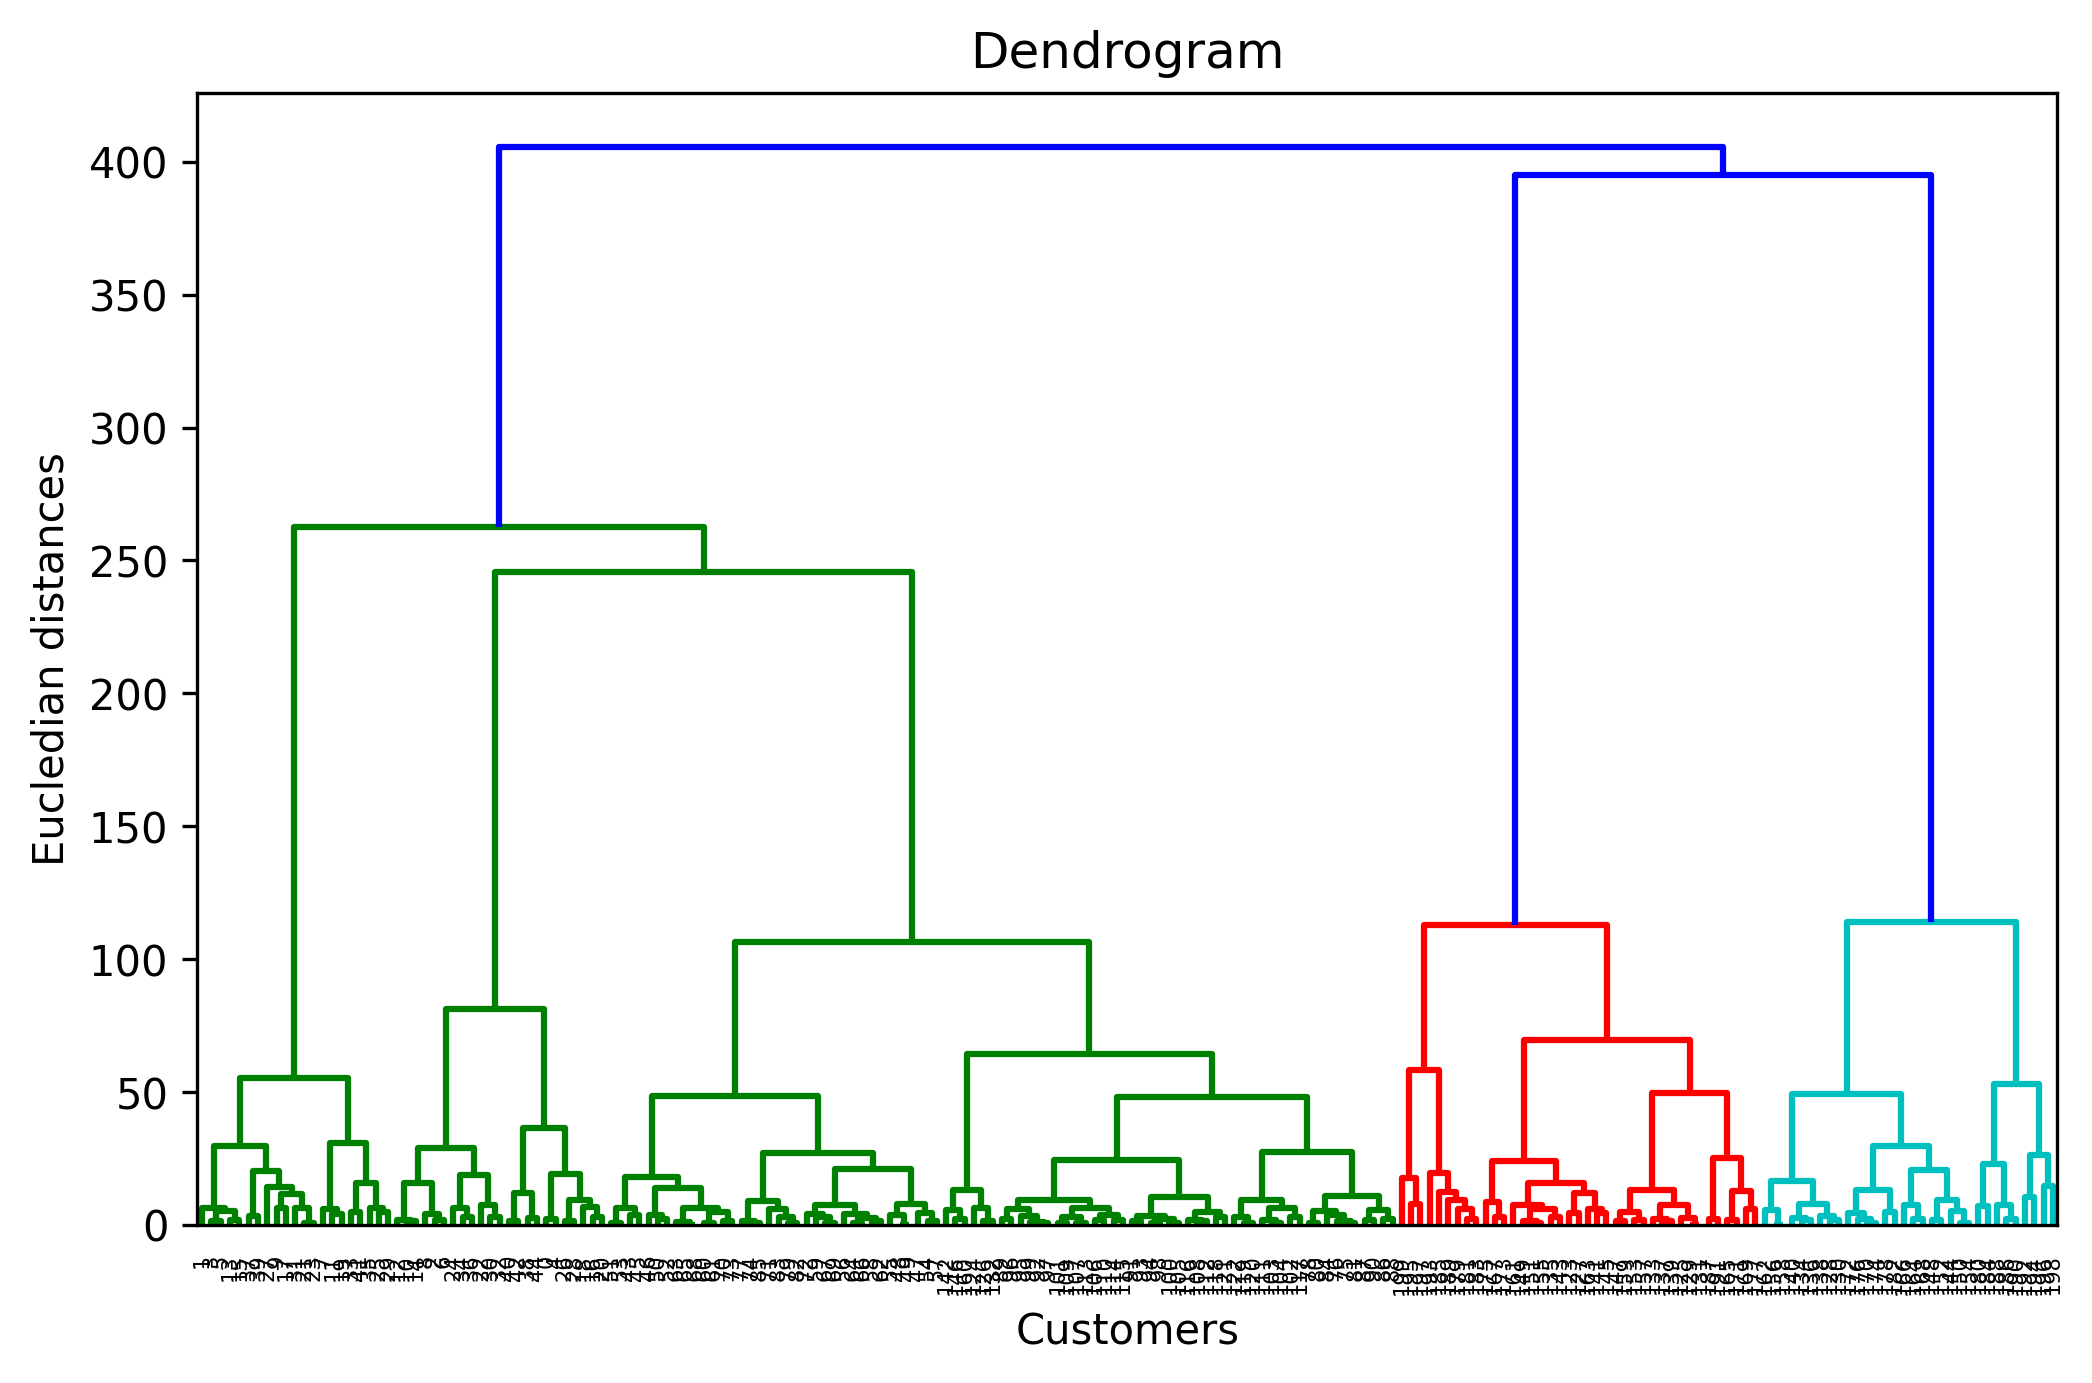

In [25]:
import scipy.cluster.hierarchy as sch

sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian distances")
plt.show()

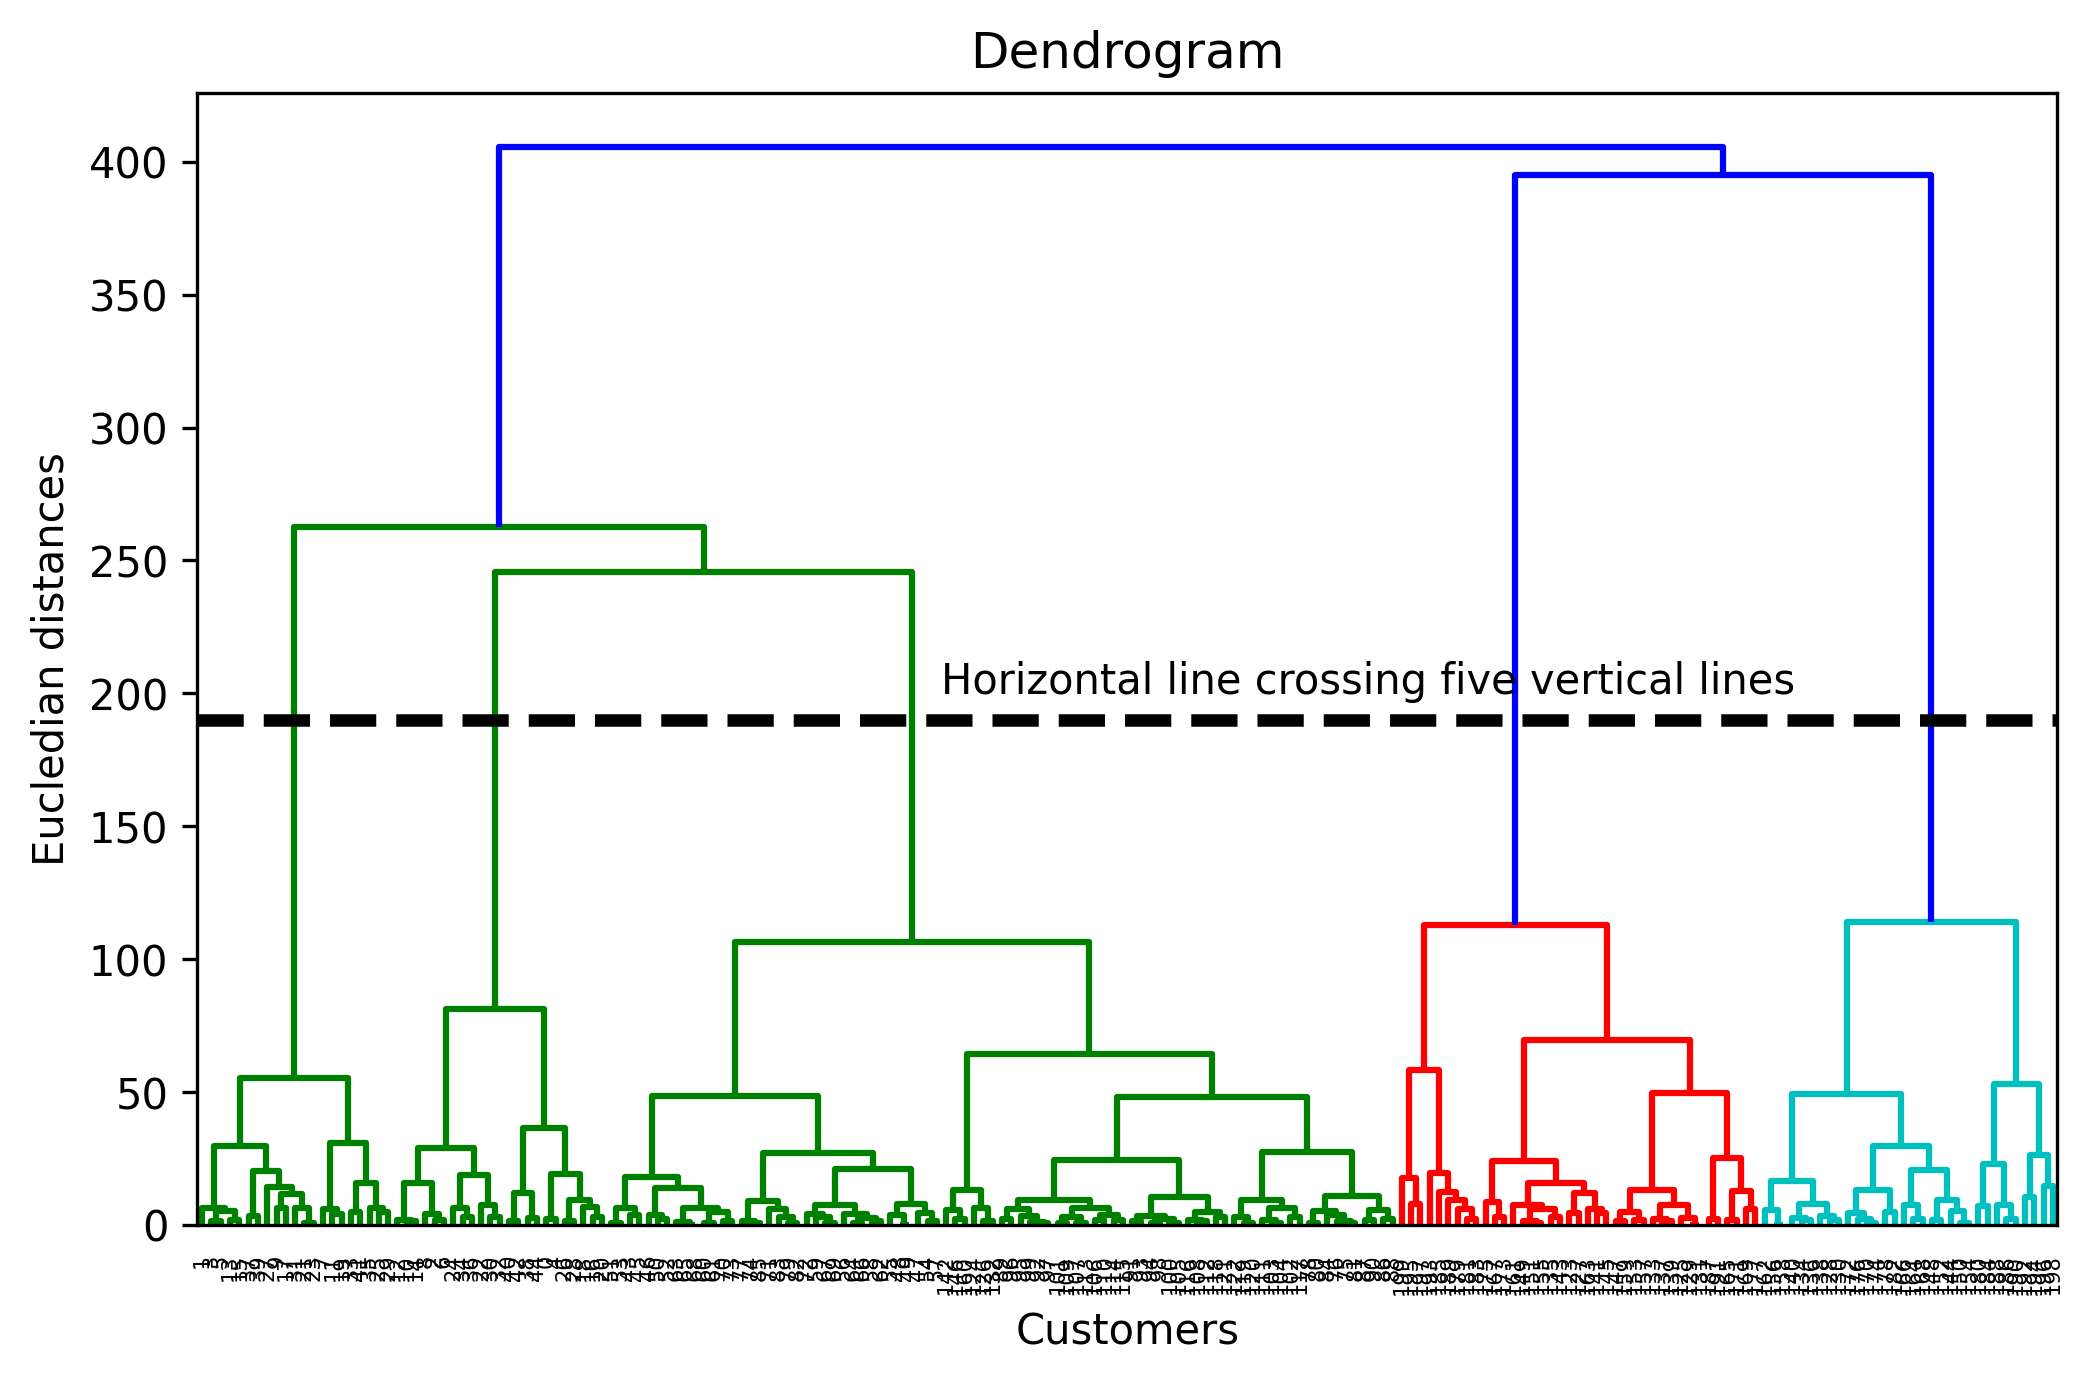

In [26]:
sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian distances")
plt.hlines(y=190,xmin=0 , xmax=2000, lw=3, linestyles="--", color='black')
plt.text(x=800, y=200, s="Horizontal line crossing five vertical lines", fontsize=10)
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [28]:
print("X: ", X[:10])
print("\n \n")
print("y_hc: ", y_hc)

X:  [[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]

 

y_hc:  [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


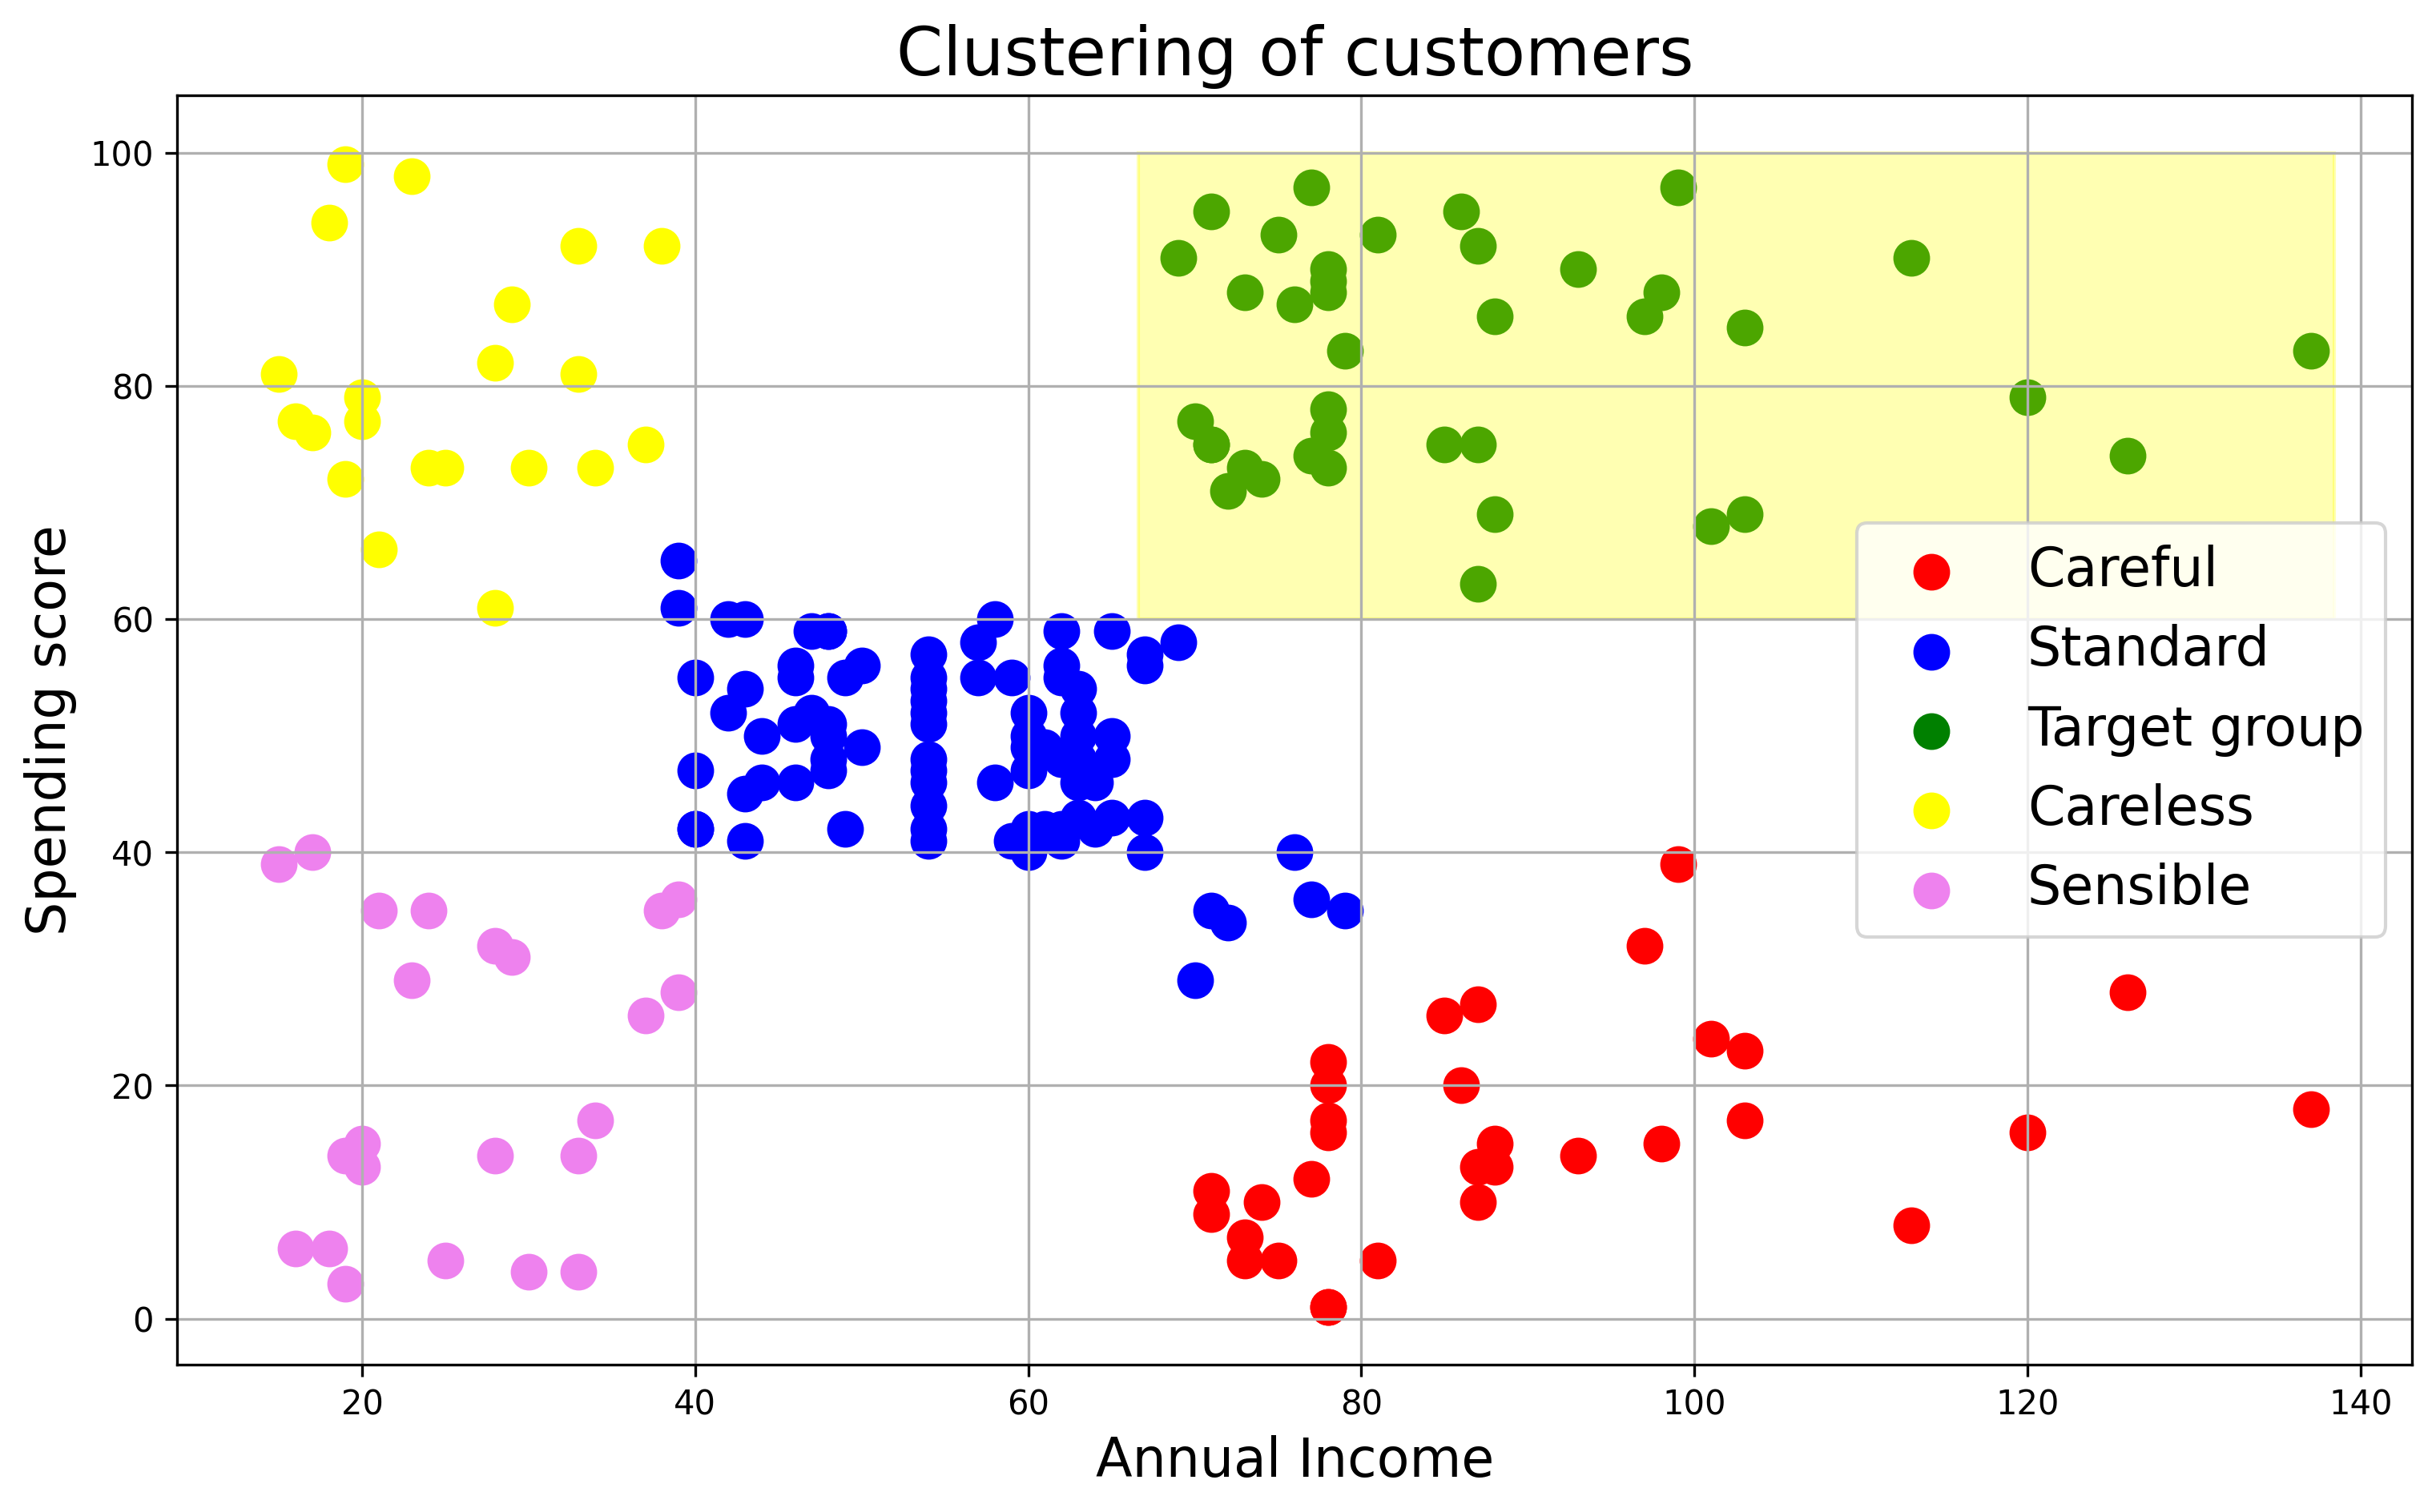

In [29]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Target group')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='yellow', label='Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='violet', label='Sensible')

plt.title("Clustering of customers", fontsize=20)
plt.xlabel("Annual Income", fontsize=16)
plt.ylabel("Spending score", fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.axhspan(ymin=60, ymax=100, xmin=0.43, xmax=0.965, alpha=0.3, color="yellow")

plt.show()

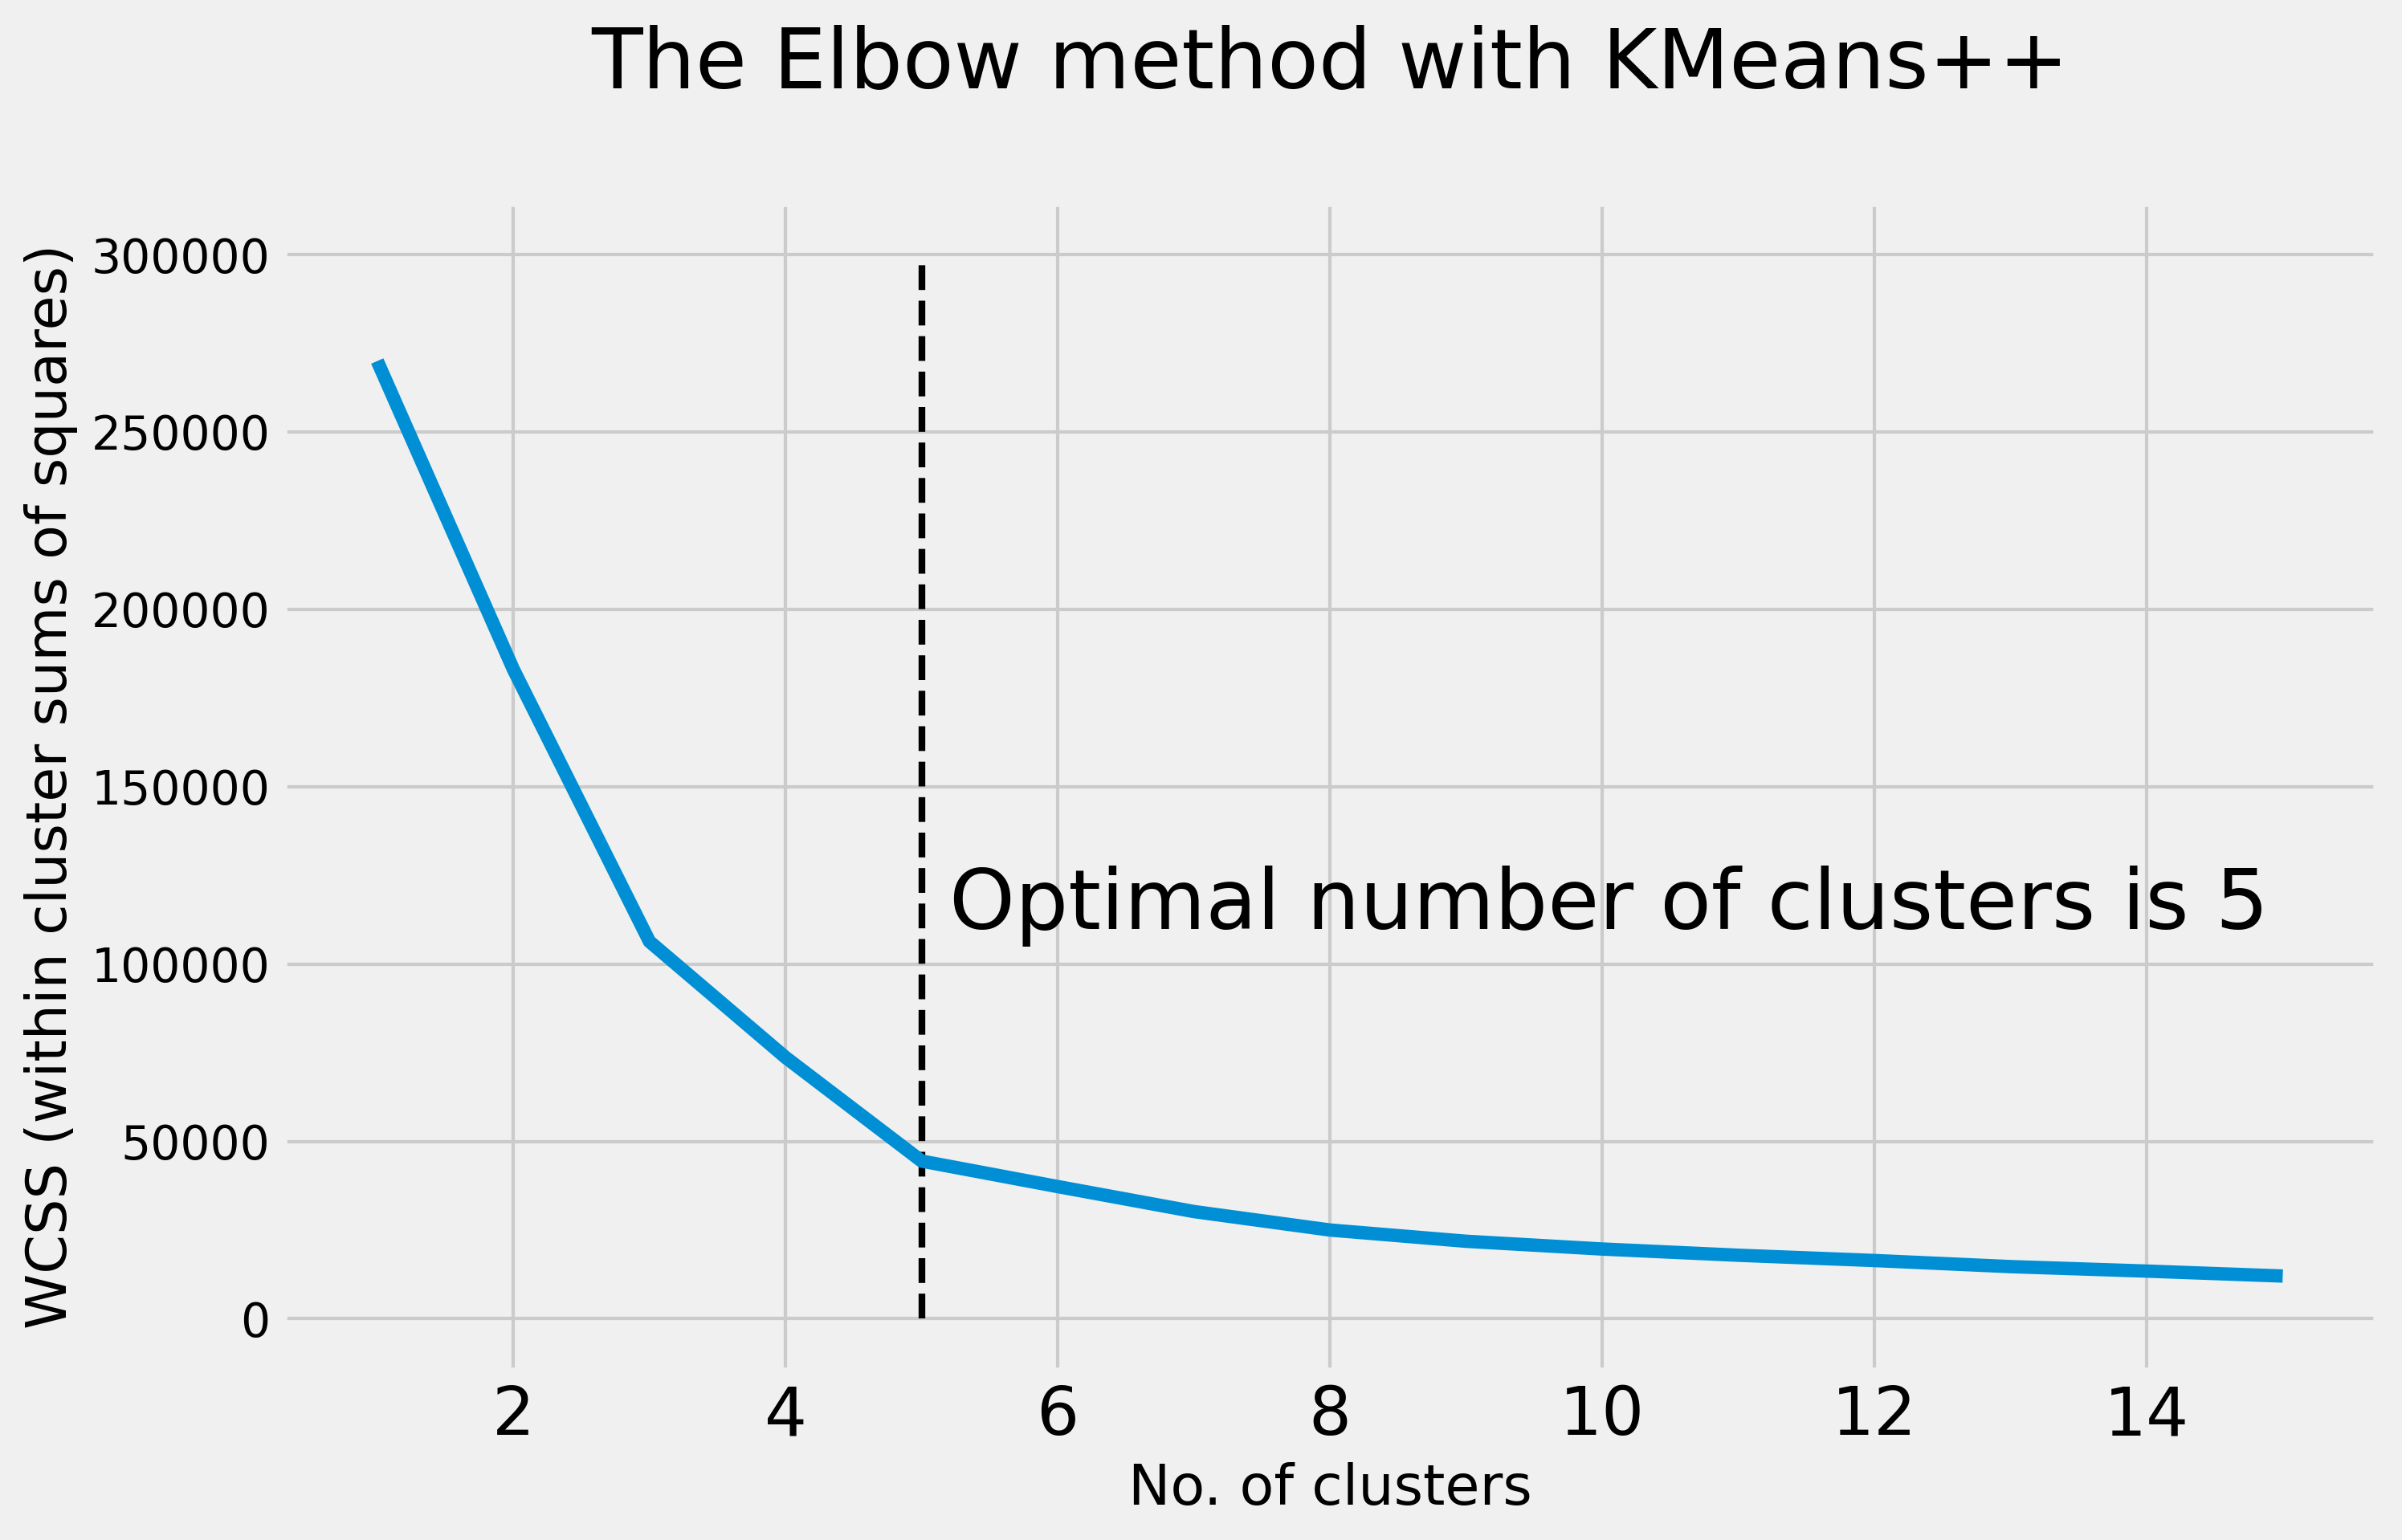

In [30]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):   #To set background style of plot
    plt.figure(figsize=(10,6))
    plt.plot(range(1,16), wcss)
    plt.title("The Elbow method with KMeans++\n", fontsize=25)
    plt.xlabel("No. of clusters")
    plt.ylabel("WCSS (within cluster sums of squares)")
    plt.xticks(fontsize=20)
    
    plt.vlines(x=5, ymin=0, ymax=300000, linestyle="--", color="black", lw=2)
    
    plt.text(x=5.2, y=110000, s="Optimal number of clusters is 5", fontsize=25)
    
    plt.show()

In [31]:
km = KMeans(n_clusters=5, max_iter=100)
km.fit(X)
y_km = km.fit_predict(X)

No handles with labels found to put in legend.


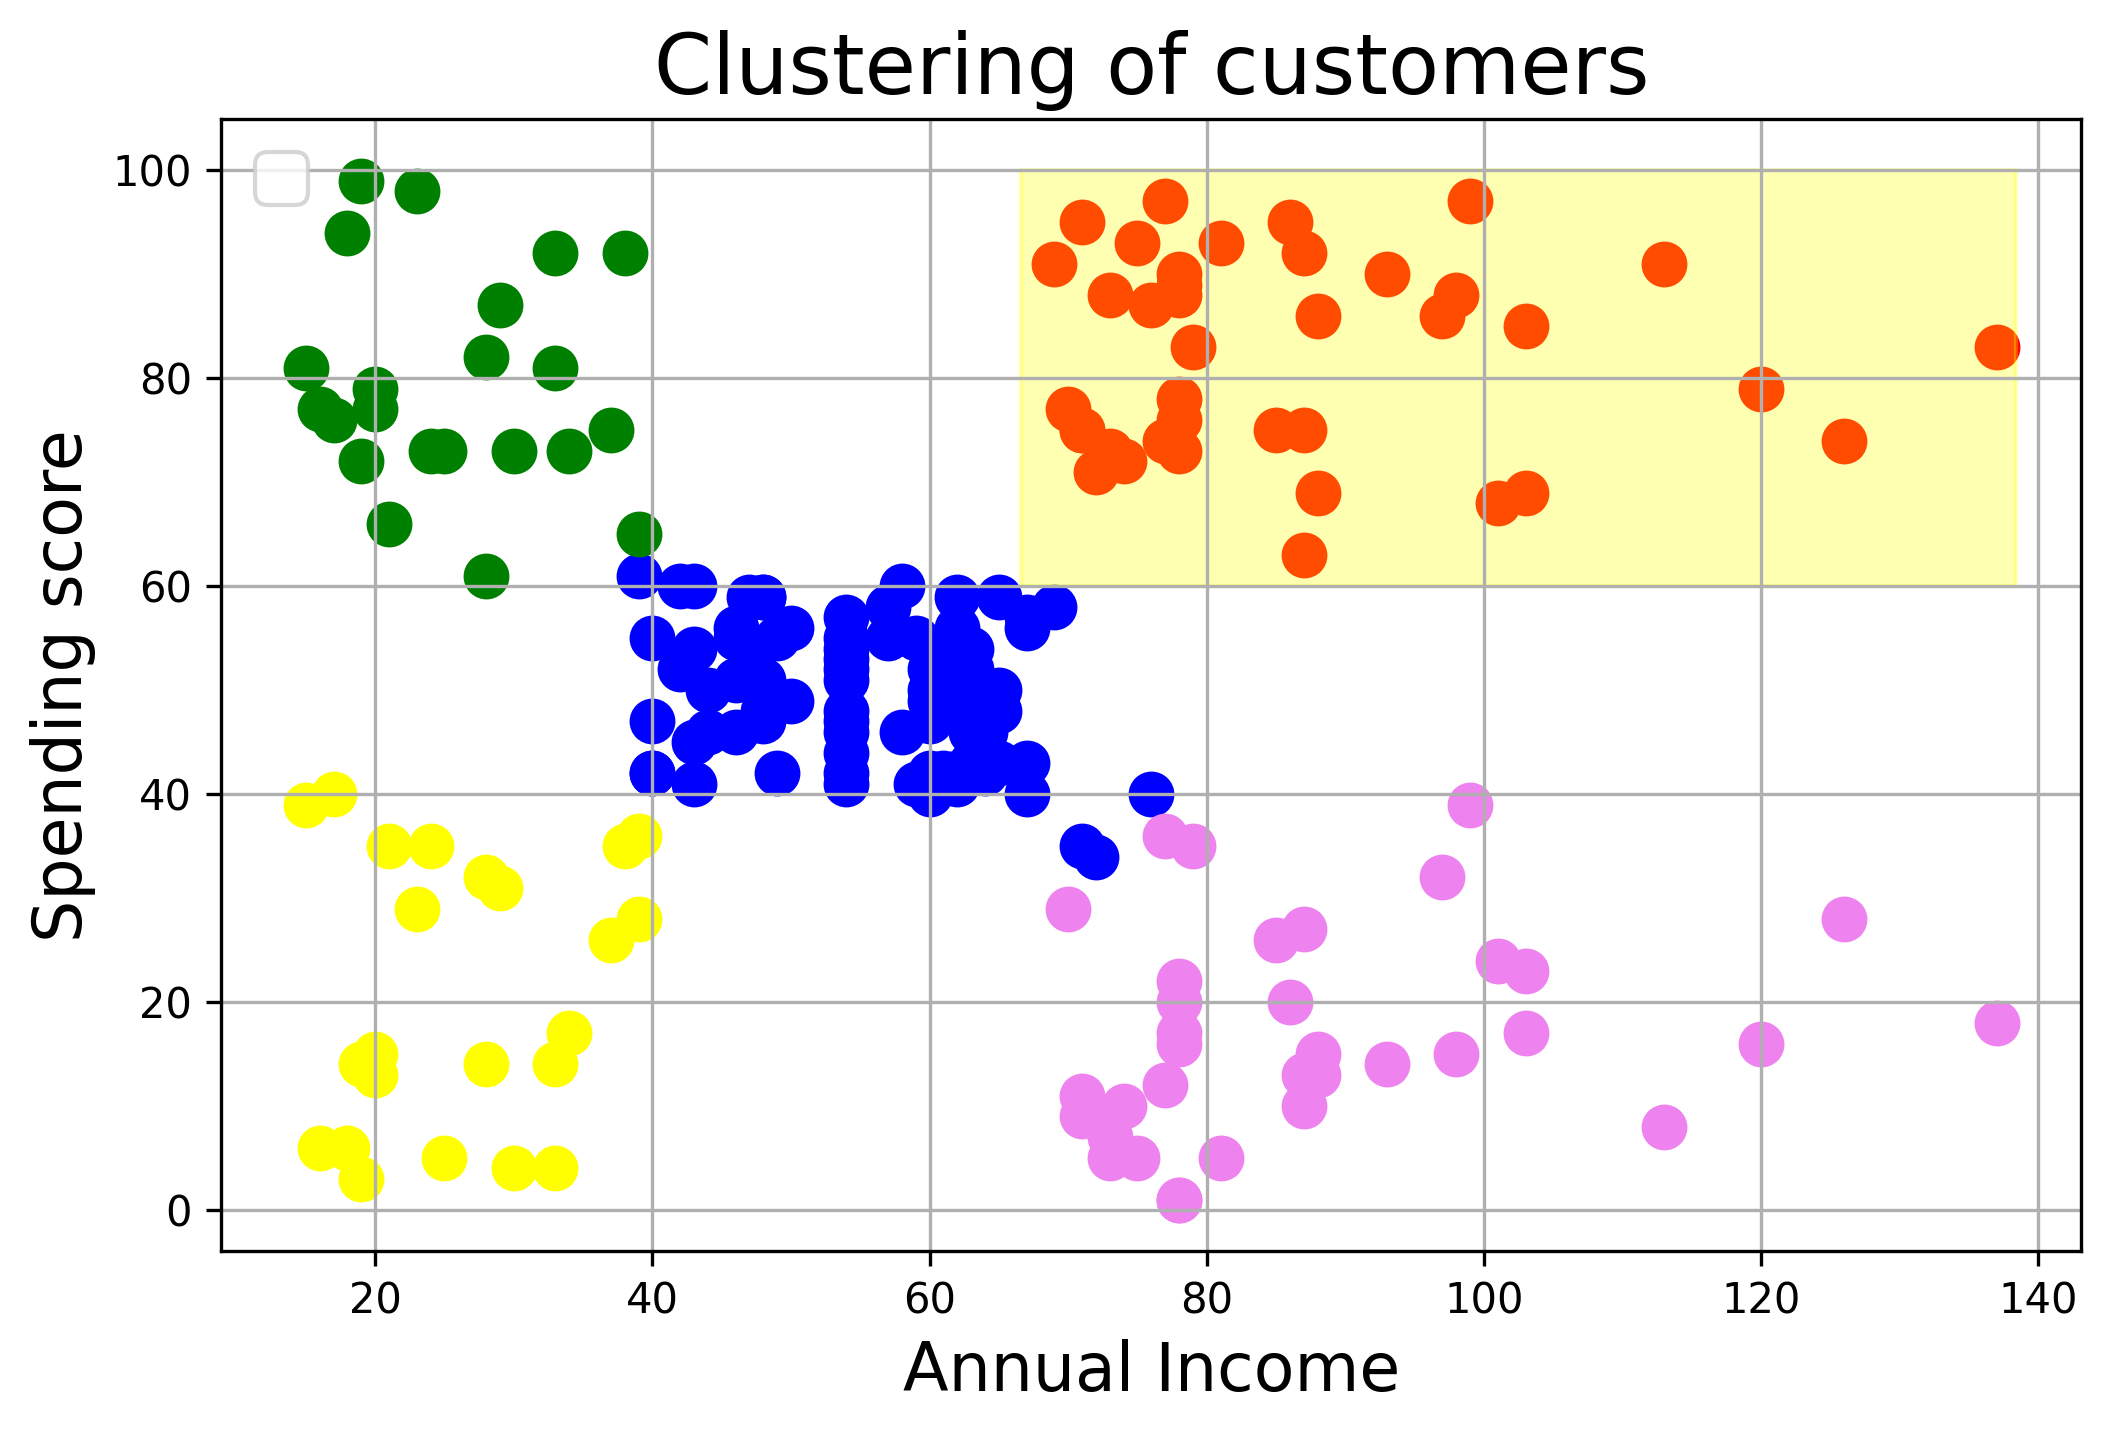

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=100, c='blue')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=100, c='red')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=100, c='violet')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=100, c='green')
plt.scatter(X[y_km == 4, 0], X[y_km == 4, 1], s=100, c='yellow')

plt.title("Clustering of customers", fontsize=20)
plt.xlabel("Annual Income", fontsize=16)
plt.ylabel("Spending score", fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.axhspan(ymin=60, ymax=100, xmin=0.43, xmax=0.965, alpha=0.3, color="yellow")

plt.show()